In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache()

# Cross session data

As many neurons are imaged across multiple session, many analyses require accessing data for those neurons from multiple data files. 

As mentioned in [Cell ids and indices](vc2p-session-data.md), when neurons are matched across multiple sessions they have the same <b>cell specimen id</b> but they have a different <b>cell index</b> within each session. 

Let's consider one neuron

In [3]:
cell_specimen_id = 517472450

We can find the sessions for which this neuron was recorded using the <b>get_ophys_experiments</b> and passing a list that contains this cell specimen id.

In [4]:
#pd.DataFrame(boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id]))

As we expect, all of these sessions are from the same <b>experiment container id</b> each from a different <b>session type</b>. If this is not clear, refer to [Experiment containers and session](vc2p-dataset.md).

Let's explore this neuron across all three sessions. First let's get the data for all three sessions.

In [5]:
#id_a = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id], session_types=['three_session_A'])[0]['id']
#id_b = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id], session_types=['three_session_B'])[0]['id']
#id_c = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id], session_types=['three_session_C'])[0]['id']

id_a = 501704220
id_b = 501559087
id_c = 501474098	

data_set_a = boc.get_ophys_experiment_data(id_a)
data_set_b = boc.get_ophys_experiment_data(id_b)
data_set_c = boc.get_ophys_experiment_data(id_c)

Let's find the cell index for this neuron in each of these sessions

In [6]:
index_a = data_set_a.get_cell_specimen_indices([cell_specimen_id])
index_b = data_set_b.get_cell_specimen_indices([cell_specimen_id])
index_c = data_set_c.get_cell_specimen_indices([cell_specimen_id])

print("Session A index: ", str(index_a))
print("Session B index: ", str(index_b))
print("Session C index: ", str(index_c))

Session A index:  [16]
Session B index:  [171]
Session C index:  [1]


PLOT MIP WITH ROI MASK

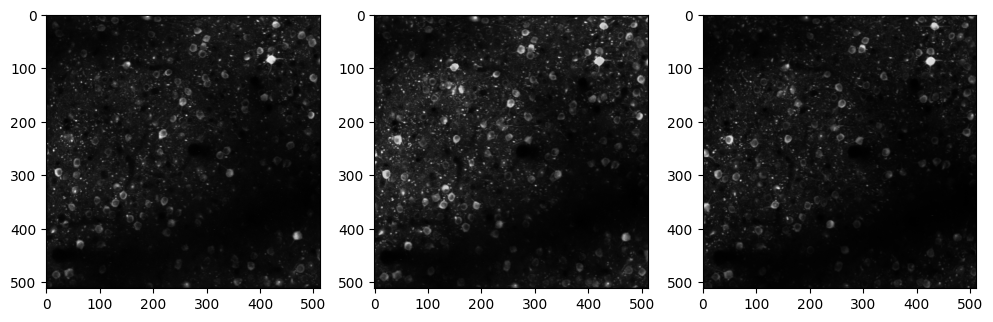

In [7]:
mp_a = data_set_a.get_max_projection()
mp_b = data_set_b.get_max_projection()
mp_c = data_set_c.get_max_projection()

rois_a = data_set_a.get_roi_mask_array()
rois_b = data_set_b.get_roi_mask_array()
rois_c = data_set_c.get_roi_mask_array()

fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(131)
ax1.imshow(mp_a, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(mp_b, cmap='gray')
ax2 = plt.subplot(133)
ax2.imshow(mp_c, cmap='gray')

TypeError: Invalid shape (1, 512, 512) for image data

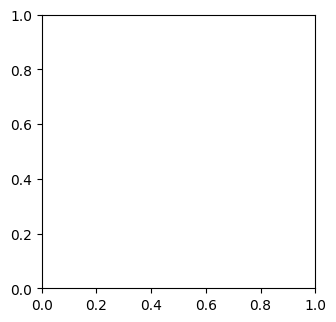

In [8]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(131)
ax1.imshow(rois_a[index_a,:,:])
ax2 = plt.subplot(132)
ax2.imshow(rois_a[index_b,:,:])
ax3 = plt.subplot(133)
ax3.imshow(rois_a[index_c,:,:])

Each experiment session consists of a different set of stimuli, but in each session has two things: at least one epoch of <b>spontaneous activity</b> and <b>natural movie one</b>.

In [ ]:
_,dff_a = data_set_a.get_dff_traces()
_,dff_b = data_set_b.get_dff_traces()
_,dff_c = data_set_c.get_dff_traces()

plt.figure(figsize=(12,4))
ax1 = plt.subplot(311)
ax1.plot(dff_a)
ax2 = plt.subplot(312)
ax2.plot(dff_b)
ax3 = plt.subplot(313)
ax3.plot(dff_c)

(reference exercise, plot the movie response for a cell across three different sessions 517472450)